In [543]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
import warnings
%matplotlib inline

In [548]:
Alone=0
Spontan=1
Sync=2
def LoadData(path):
        AloneList=[];SpontanList=[];SyncList=[]
        all_files = glob.glob(path + "/*")
        for folder in all_files:
            print("\nloading in" ,folder, ':')
            files = glob.glob(folder + "/*.csv")
            files=last3(files)
            for filename in files:
                df = pd.read_csv(filename, index_col=None, header=0)
                type = None
                transform(df)
                
                if("Alone" in filename):
                    type = Alone
                    df["State"] = type
                    AloneList.append(df)
                elif("Sync" in filename):
                    type = Sync
                    df["State"] = type
                    SyncList.append(df)
                elif("Spontan" in filename):
                    type = Spontan
                    df["State"] = type
                    SpontanList.append(df)
                    
                print('loaded ', filename, type)
        listData = np.array([AloneList,SpontanList,SyncList])     
        return listData


def last3(files):
    lafile=[]
    for i in range(3):
        latest_file = max(files, key=os.path.getmtime)
        lafile.append(latest_file)
        files.remove(latest_file)
    return lafile

def transform(df):
    x=df.iloc[:,0][0]
    df.iloc[:,0] = df.iloc[:,0] - x
    df =remove7(df) 
    df.columns = [c.replace(' ', '').replace('#', '') for c in df.columns]  
    df_right=df[df.iloc[:, 2]=='right'].reset_index(drop=True)
    df_left=df[df.iloc[:, 2]=='left'].reset_index(drop=True)
    df=pd.merge(df_right, df_left, left_index=True, right_index=True)
    df.columns=[c.replace('_x', 'Right').replace('_y', 'Left') for c in df.columns]
    return df

    
def remove7(df):
    return df[df.iloc[:,0]>7]

def toVector(df):
    j=0;arr=[]
    for i in range(5):
        df1=df.iloc[j::5, :]
        arr.append(df1)
        j+=1
    df
        


In [549]:
path=r'C:\Users\נעמיה\data-science\extraFiles\Training'
listdata=LoadData(path)


loading in C:\Users\נעמיה\data-science\extraFiles\Training\Evyatar Cohen :
loaded  C:\Users\נעמיה\data-science\extraFiles\Training\Evyatar Cohen\Evyatar636771054555711409Alone.csv 0
loaded  C:\Users\נעמיה\data-science\extraFiles\Training\Evyatar Cohen\Evyatar636771053639929594Sync.csv 2
loaded  C:\Users\נעמיה\data-science\extraFiles\Training\Evyatar Cohen\Evyatar636771052727603804Spontan.csv 1

loading in C:\Users\נעמיה\data-science\extraFiles\Training\Nofar Social_Nuero :
loaded  C:\Users\נעמיה\data-science\extraFiles\Training\Nofar Social_Nuero\Nofar636759797397919664Sync.csv 2
loaded  C:\Users\נעמיה\data-science\extraFiles\Training\Nofar Social_Nuero\Nofar636759796290435160Alone.csv 0
loaded  C:\Users\נעמיה\data-science\extraFiles\Training\Nofar Social_Nuero\Nofar636759795182793299Spontan.csv 1

loading in C:\Users\נעמיה\data-science\extraFiles\Training\Oriya Social_Nuero :
loaded  C:\Users\נעמיה\data-science\extraFiles\Training\Oriya Social_Nuero\Oriya636759806131350399Sync.csv 2


In [553]:
listdata.shape

(3, 9)

In [504]:
df2 = pd.read_csv(r'C:\Users\נעמיה\data-science\extraFiles\Training\Evyatar Cohen\Evyatar636771053639929594Sync.csv')
ef2=pd.read_csv(r'C:\Users\נעמיה\data-science\extraFiles\Training\Evyatar Cohen\Evyatar636771052727603804Spontan.csv')

# df.columns = [c.replace(' ', '').replace('#', '') for c in df.columns]


In [506]:
df2=transform(df2,Sync)
ef2=transform(ef2,Spontan)


In [508]:
list(ef2.columns)

['TimeRight',
 'FrameIDRight',
 'HandTypeRight',
 'handsRight',
 'PositionXRight',
 'PositionYRight',
 'PositionZRight',
 'VelocityXRight',
 'VelocityYRight',
 'VelocityZRight',
 'PitchRight',
 'RollRight',
 'YawRight',
 'WristPosXRight',
 'WristPosYRight',
 'WristPosZRight',
 'ElbowposXRight',
 'ElbowPosYRight',
 'ElbowPosZRight',
 'GrabStrenthRight',
 'GrabAngleRight',
 'PinchStrengthRight',
 'stateRight',
 'TimeLeft',
 'FrameIDLeft',
 'HandTypeLeft',
 'handsLeft',
 'PositionXLeft',
 'PositionYLeft',
 'PositionZLeft',
 'VelocityXLeft',
 'VelocityYLeft',
 'VelocityZLeft',
 'PitchLeft',
 'RollLeft',
 'YawLeft',
 'WristPosXLeft',
 'WristPosYLeft',
 'WristPosZLeft',
 'ElbowposXLeft',
 'ElbowPosYLeft',
 'ElbowPosZLeft',
 'GrabStrenthLeft',
 'GrabAngleLeft',
 'PinchStrengthLeft',
 'stateLeft']

In [492]:
df3=df2.query('56<=TimeRight<=58')
df3=df3.iloc[::2,]
ef3=ef2.query('34<=TimeRight<=36')
ef3=ef3.iloc[::2,]

<IPython.core.display.Javascript object>


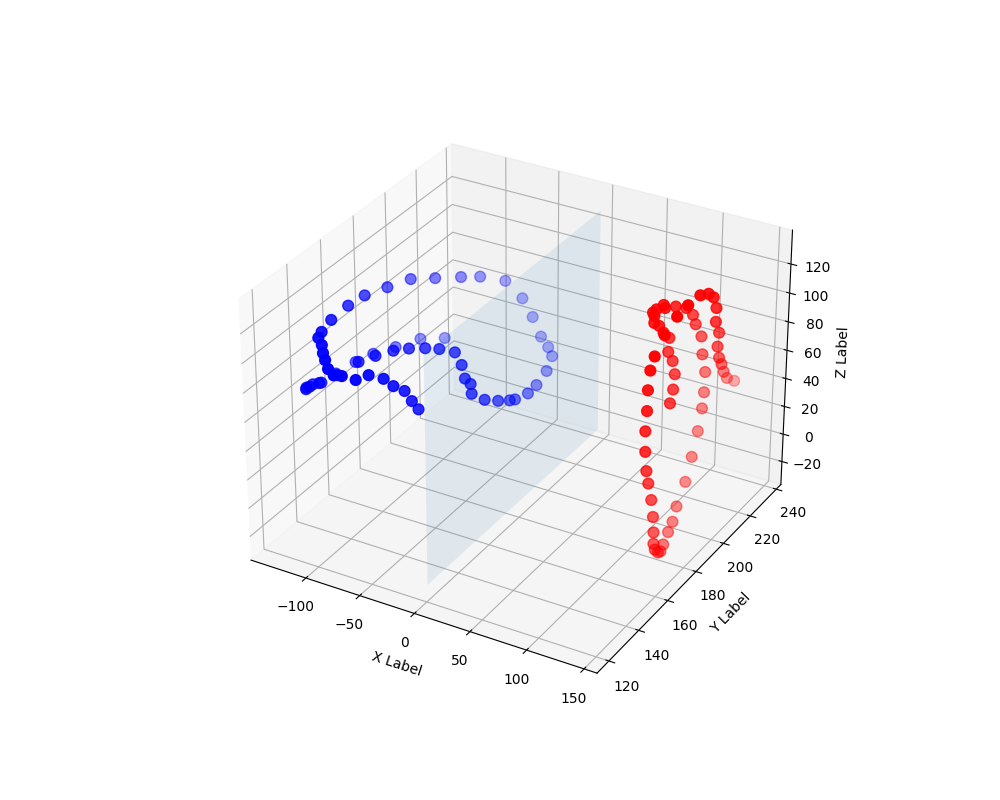

In [493]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
from matplotlib.patches import Rectangle, PathPatch
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection



fig = plt.figure(1,figsize=(10,8),)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(df3['PositionXRight'], df3['PositionYRight'], df3['PositionZRight'], c='r', marker='o',s=60)
ax.scatter(df3['PositionXLeft'], df3['PositionYLeft'], df3['PositionZLeft'], c='b', marker='o',s=60)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
def Max(sr1,sr2):
    return max(max(sr1),max(sr2))
def Min(sr1,sr2):
    return min(min(sr1),min(sr2))
ymin=Min(df3['PositionYLeft'],df3['PositionYRight'])
zmin=Min(df3['PositionZLeft'],df3['PositionZRight'])
ymax=Max(df3['PositionYLeft'],df3['PositionYRight'])
zmax=Max(df3['PositionZLeft'],df3['PositionZRight'])

x = [0, 0, 0, 0]
y = [ymin, ymin, ymax, ymax]
z = [zmin, zmax, zmin, zmax]

vertices = [[0, 1, 2], [0, 1, 3], [0, 2, 3], [1, 2, 3]]
tupleList = list(zip(x, y, z))
poly3d = [[tupleList[vertices[ix][iy]] for iy in range(len(vertices[0]))] for ix in range(len(vertices))]
# ax.scatter(x,y,z)
collection = Poly3DCollection(poly3d, linewidths=1, alpha=0.05)
# face_color = [0.5, 0.1, 1] # alternative: matplotlib.colors.rgb2hex([0.5, 0.5, 1])
# collection.set_facecolor(face_color)
ax.add_collection3d(collection)

# ax = fig.add_subplot(1, 2, 2, projection='3d')
# ax.scatter(ef3['PositionXRight'], ef3['PositionYRight'], ef3['PositionZRight'], c='brown', marker='o',s=60)
# ax.scatter(ef3['PositionXLeft'], ef3['PositionYLeft'], ef3['PositionZLeft'], c='purple', marker='o',s=60)
# ymin=Min(ef3['PositionYLeft'],ef3['PositionYRight'])
# zmin=Min(ef3['PositionZLeft'],ef3['PositionZRight'])
# ymax=Max(ef3['PositionYLeft'],ef3['PositionYRight'])
# zmax=Max(ef3['PositionZLeft'],ef3['PositionZRight'])

# x = [0, 0, 0, 0]
# y = [ymin, ymin, ymax, ymax]
# z = [-70, 10, -70, 10]

# vertices = [[0, 1, 2], [0, 1,0], [0, 2, 0], [0,0, 1]]
# tupleList = list(zip(x, y, z))
# collection = Poly3DCollection(poly3d, linewidths=5, alpha=0.05)
# # face_color = [0.5, 0.1, 1] # alternative: matplotlib.colors.rgb2hex([0.5, 0.5, 1])
# # collection.set_facecolor(face_color)
# ax.add_collection3d(collection,zs=-10)
# zmax

<IPython.core.display.Javascript object>


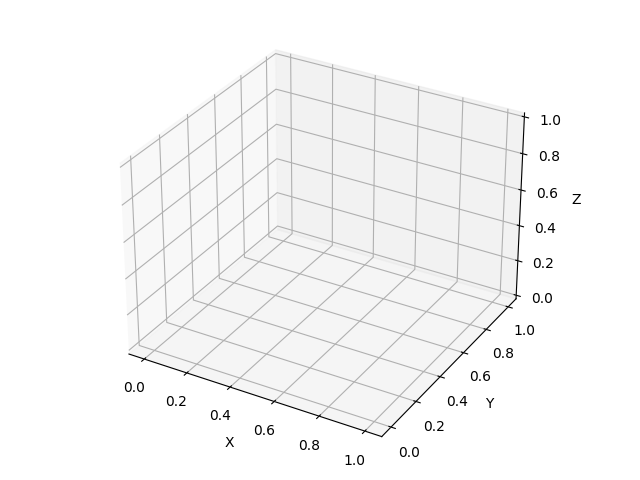

In [491]:
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML



a = np.random.rand(2000, 3)*10
t = np.array([np.ones(100)*i for i in range(20)]).flatten()
# df = pd.DataFrame({"time": t ,"x" : a[:,0], "y" : a[:,1], "z" : a[:,2]})

# def update_graph(num):
#     data=df[df['time']==num]
#     graph._offsets3d = (data.x, data.y, data.z)
#     title.set_text('3D Test, time={}'.format(num))


# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# title = ax.set_title('3D Test')

# # data=df[df['time']==0]
# # ax.scatter(df3['PositionXRight'], df3['PositionYRight'], df3['PositionZRight'], c='r', marker='o',s=60)
# # ax.scatter(df3['PositionXLeft'], df3['PositionYLeft'], df3['PositionZLeft'], c='b', marker='o',s=60)
# graph = ax.scatter(df3['PositionXRight'], df3['PositionYRight'], df3['PositionZRight'])

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
sc = ax.scatter([],[],[], c='darkblue', alpha=0.5)

def update(i):
    sc._offsets3d = (df3.PositionXRight.values[:i], df3.PositionYRight.values[:i], df3.PositionZRight.values[:i])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


ani = matplotlib.animation.FuncAnimation(fig, update, frames=len(df3), interval=60)

plt.tight_layout()
plt.show()

from IPython.display import HTML
HTML(ani.to_jshtml())

In [4]:
# for i in df.iloc[:, 1]:

df_right=df[df.iloc[:, 2]=='right'].reset_index(drop=True)
df_left=df[df.iloc[:, 2]=='left'].reset_index(drop=True)
df2=pd.merge(df_right, df_left, left_index=True, right_index=True)
df2.columns=[c.replace('_x', 'Right').replace('_y', 'Left') for c in df2.columns]
df2

TimeRight  FrameIDRight HandTypeRight  handsRight  PositionXRight  \
0      434.2387        139878         right           2        121.9688   
1      434.2553        139880         right           2        121.6194   
2      434.2718        139882         right           2        121.0388   
3      434.2884        139884         right           2        120.6072   
4      434.3050        139885         right           2        120.4184   
...         ...           ...           ...         ...             ...   
4098   502.1338        147698         right           2        111.3970   
4099   502.1499        147700         right           2        110.0870   
4100   502.1665        147702         right           2        109.1714   
4101   502.1830        147704         right           2        108.9017   
4102   502.1996        147706         right           2        108.9669   

      PositionYRight  PositionZRight  VelocityXRight  VelocityYRight  \
0           230.3867        61.91891        7.825050     -222.591000   
1           226.1235        64.10963      -32.326430     -248.082700   
2           222.2049        65.98412      -28.869160     -210.964200   
3           219.1105        67.75517      -18.538570     -156.224000   
4           217.8251        68.88145      -22.010350     -149.861400   
...              ...             ...             ...             ...   
4098        182.9246        34.27466      -42.475920     -117.845800   
4099        180.8389        32.92039      -71.148420     -111.439600   
4100        179.3461        31.84416      -46.123690      -69.914710   
4101        178.8129        31.02029      -15.531000       -5.445981   
4102        179.1278        30.35721        5.587708       20.259880   

      VelocityZRight  ...   YawLeft  WristPosXLeft  WristPosYLeft  \
0          121.91490  ...  0.624079      -107.3702       221.7536   
1          109.73410  ...  0.653397      -106.8187       220.1253   
2          109.70620  ...  0.683048      -106.3970       217.4241   
3          112.23140  ...  0.709288      -105.9420       213.8663   
4          131.31480  ...  0.731741      -105.8699       212.5583   
...              ...  ...       ...            ...            ...   
4098       -61.32522  ...  1.065970      -127.3144       194.4717   
4099       -69.28531  ...  1.007618      -126.9333       193.0801   
4100       -57.69822  ...  0.956325      -126.9241       191.1363   
4101       -50.80544  ...  0.901075      -126.4018       188.6597   
4102       -34.82480  ...  0.855786      -125.3931       185.2068   

      WristPosZLeft  ElbowposXLeft  ElbowPosYLeft  ElbowPosZLeft  \
0          46.12994      -254.8560       22.47225       40.89467   
1          48.09507      -258.4003       23.92692       43.43317   
2          50.26434      -262.3120       24.76191       42.24427   
3          52.21570      -271.2896       29.79138       35.81071   
4          53.02802      -275.5691       32.85570       32.98580   
...             ...            ...            ...            ...   
4098       59.52803      -299.5664       15.22464       16.52840   
4099       58.90355      -298.9101       12.87815       18.89758   
4100       58.91284      -302.6545       12.99574       26.75648   
4101       59.13661      -308.9988       15.97083       37.08796   
4102       58.86960      -314.7061       19.05455       44.61267   

      GrabStrenthLeft  GrabAngleLeft  PinchStrengthLeft  
0                 0.0            0.0                0.0  
1                 0.0            0.0                0.0  
2                 0.0            0.0                0.0  
3                 0.0            0.0                0.0  
4                 0.0            0.0                0.0  
...               ...            ...                ...  
4098              0.0            0.0                0.0  
4099              0.0            0.0                0.0  
4100              0.0            0.0                0.0  
4101          

In [271]:
df3=df2.iloc[::12, :]
df4=df3.iloc[1::5, :]
df4


TimeRight  FrameIDRight HandTypeRight  handsRight  PositionXRight  \
12       7.2065        139901         right           2       100.96660   
72       8.2009        140016         right           2       -55.39437   
132      9.1945        140129         right           2       128.20580   
192     10.1888        140244         right           2       109.68330   
252     11.1830        140358         right           2        33.18487   
...         ...           ...           ...         ...             ...   
3852    70.8270        147230         right           2       131.37750   
3912    71.8211        147345         right           2       108.95040   
3972    72.8150        147458         right           2       115.47220   
4032    73.8089        147572         right           2       135.06350   
4092    74.8030        147686         right           2       122.39560   

      PositionYRight  PositionZRight  VelocityXRight  VelocityYRight  \
12          196.2121        80.99995      -200.73610      -144.05010   
72          244.8362        52.77498        87.10817        65.38012   
132         211.8923        46.92529      -345.32970        19.13621   
192         213.3879        33.86772       382.65190        41.54617   
252         287.7516        41.11238      -108.11500       351.93610   
...              ...             ...             ...             ...   
3852        217.5659       104.18960        53.77132       162.98990   
3912        175.7269        43.45728      -139.59410      -213.97670   
3972        207.3344       145.23940        82.07159        76.26967   
4032        224.7917       120.88190        42.19149        23.56833   
4092        198.9203        44.74859      -140.35390      -214.51860   

      VelocityZRight  ...  WristPosXLeft  WristPosYLeft  WristPosZLeft  \
12         72.518330  ...     -102.66550       180.6312       62.61880   
72         34.060040  ...     -190.34470       209.2608       41.00745   
132         9.232875  ...      -90.18872       162.3481       47.62826   
192         0.847449  ...     -109.87220       160.0526       43.16216   
252       -53.056560  ...     -185.34860       196.5443       63.11943   
...              ...  ...            ...            ...            ...   
3852      242.216600  ...     -126.71530       142.5033       83.72205   
3912      -68.776350  ...     -129.27910       149.5655       61.29136   
3972      -81.051530  ...     -133.94530       136.7087       74.77932   
4032      309.472100  ...     -135.86180       162.4081       62.19787   
4092     -144.151600  ...     -133.48110       190.3688       65.40081   

      ElbowposXLeft  ElbowPosYLeft  ElbowPosZLeft  GrabStrenthLeft  \
12        -265.6804      -4.053966      34.157590              0.0   
72        -340.5146      12.294580      28.929900              0.0   
132       -264.6026     -12.932050      28.941290              0.0   
192       -270.9232     -28.132580      31.269560              0.0   
252       -328.0555      -5.733183      77.648440              0.0   
...             ...            ...            ...              ...   
3852      -331.9745       8.494729      24.059550              0.0   
3912      -342.6538      23.736620      13.462610              0.0   
3972      -317.8026     -21.339910       5.019966              0.0   
4032      -345.0781      29.641460      14.755260              0.0   
4092      -305.6797       7.904625      38.873620              0.0   

      GrabAngleLeft  PinchStrengthLeft  stateLeft  
12         0.000000                0.0          1  
72         0.105306                0.0          1  
132        0.000000                0.0          1  
192        0.000000                0.0          1  
252        0.000000                0.0          1  
...             ...                ...        ...  
3852       0.013866                0.0          1  
3912       0.087880                0.0          1  
3972       0.000000                0.0    

In [276]:
f5=df3.query('72<=TimeRight<=73')
f5.stack()

3924  TimeRight               72.02
      FrameIDRight           147366
      HandTypeRight           right
      handsRight                  2
      PositionXRight       104.8376
                             ...   
3972  ElbowPosZLeft        5.019966
      GrabStrenthLeft           0.0
      GrabAngleLeft             0.0
      PinchStrengthLeft         0.0
      stateLeft                   1
Length: 230, dtype: object

In [277]:
pd.DataFrame(f5.values.reshape(1, -1))

0       1      2   3         4        5         6         7         8    \
0  72.02  147366  right   2  104.8376  168.903  40.38342  50.81308  138.1566   

        9    ...       220       221       222       223       224       225  \
0  40.46118  ... -133.9453  136.7087  74.77932 -317.8026 -21.33991  5.019966   

   226  227  228 229  
0  0.0  0.0  0.0   1  

[1 rows x 230 columns]

<AxesSubplot:>

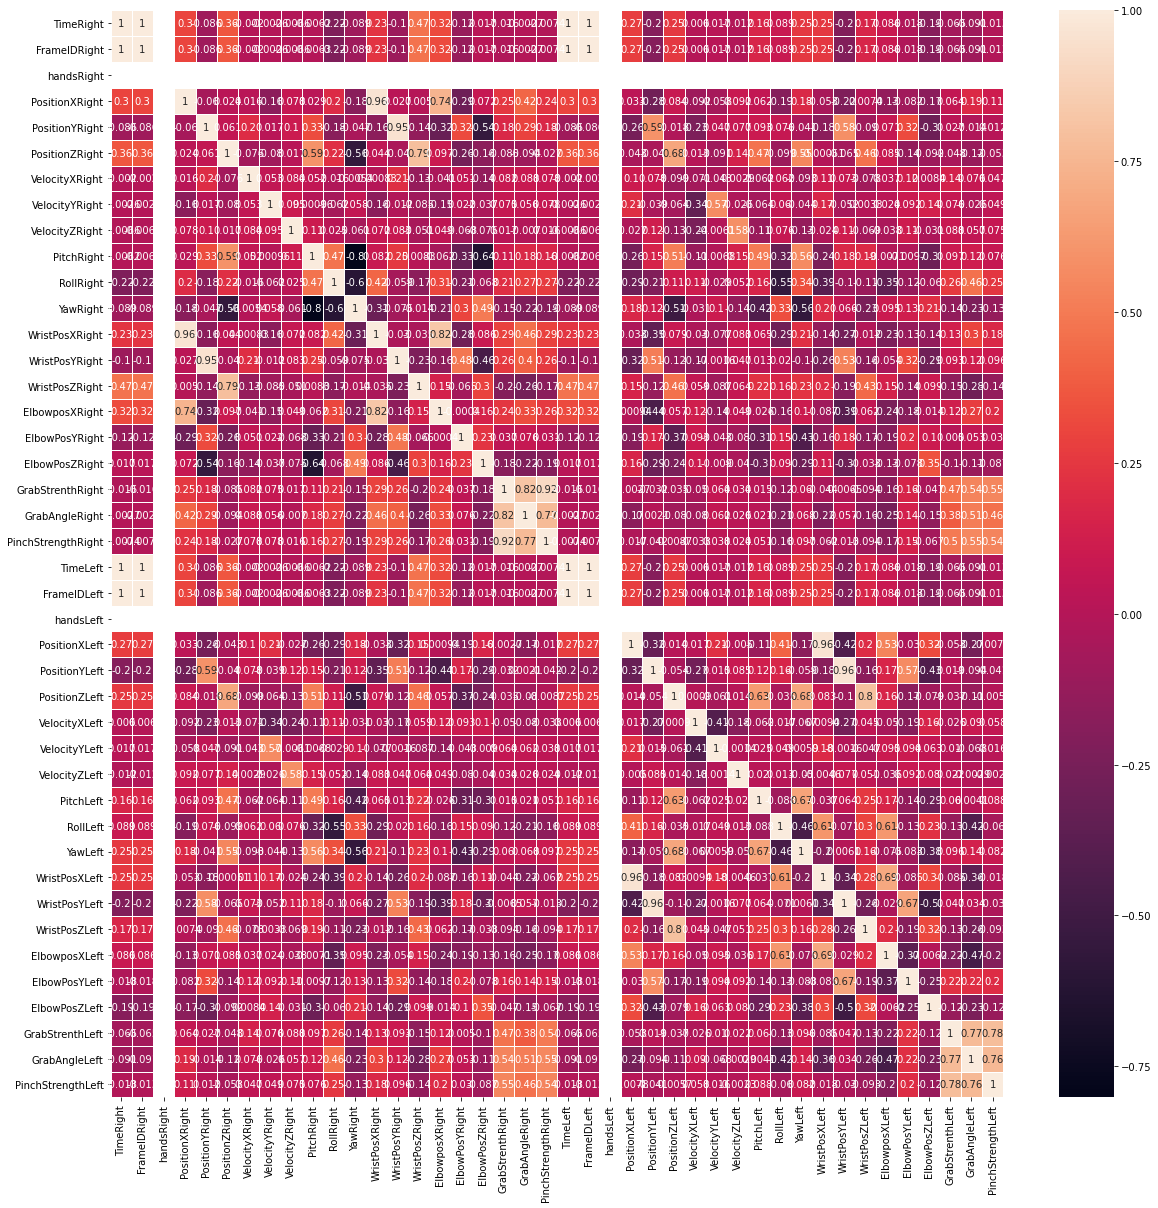

In [87]:
corr = df2.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(corr, annot=True ,linewidths=0.5, ax=ax)

In [29]:
df_right.sample(10)

AttributeError: 'NoneType' object has no attribute 'sample'

In [5]:
def animal_name(animal):
    # here be dragons
    return some_string
cat=5
print(animal_name(cat))

NameError: name 'some_string' is not defined